## Estimate the Relay Token Price for HORUS/BNT Bancor Contract
by: Gunnar Pope

9/19/2018

Horuspay.io

telegram: @gunnarpope
github: https://github.com/gunnarpope

The price of the relay token is highly driven by market pricing and the intitial supply of connector tokens, which drives the connector weight factor of the Bancor smart contract. Providing the Relay token with too little of a balance can lead to unstable prices of your relay token, which will have to be compensated for by depositing more into the connector token balance. Having an ample supply of connector balance leads to a very stable token price, which is beneficial to your user base.


This work calculates how the price of HORUS/BNT should change given our initial supply of HORUS tokens, in an attempt to fix the connector weight at 1. Seeing that both HORUS and BNT prices are time varient, our choice of initial HORUS supply only estimates what the connector weight will be at that point in time. Given the last 30 days of market prices, we can say that we are 95% confident that a supply of 1.6M HORUS will give us a connector weight between 0.60 and 1.3 (with 0.6 leading to less stablility). The final graph shows how the price of HORUS/BNT will change over time as the price deminishes. 

In [1]:
# First off, recreate table from Bancor Relay Example to double check formulas
# https://docs.google.com/spreadsheets/d/1gZtQmb7rravEzu7UktWa5WRkTMe9NuJzEfyNBFn6LL8/edit#gid=1014885684

# 9/18/18
# author: gunnar pope
# github: https://github.com/gunnarpope
# telegram: @gunnarpope

import numpy as np
import matplotlib.pyplot as plt

# HORUS is smart token
# BNT is connector
def BNTtoHORUS(bnt):
    global BNTbalance, HORUSsupply, CW
    BNTbalance += bnt
    HORUSissued = HORUSsupply* ((1+bnt/(1.0*BNTbalance))**(CW) - 1)
    HORUSsupply += HORUSissued
    return HORUSissued

def HORUStoBNT(horus):
    global BNTbalance, HORUSsupply, CW
    HORUSsupply -= horus 
    BNTissued = BNTbalance *(1+horus/(1.0*HORUSsupply)**(1/(1.0*CW))-1)
    BNTbalance -= BNTissued
    return BNTissued
                             
def price(bntbalance, horbalance,cw):
    price = bntbalance/(1.0*horbalance*cw)
    return price
                             
def effective_price(con_exchanged, smart_exchanged):
    return(con_exchanged/(1.0*smart_exchanged))

########## INPUTS ##########

global BNTbalance, HORUSsupply, CW
BNTbalance = 100.0 #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
HORUSsupply = 100.0
HORUSmarketcap = BNTbalance # HORUSsupply / 118.333
CW = BNTbalance / HORUSmarketcap
############################


print('CW :', CW)
for BNTreceived in [8.0, 9.0, 10.0, 11.0, 3.4]:
    Hissued = BNTtoHORUS(BNTreceived)
    print("BNTrecieved:\t", BNTreceived)
    print("HORUSissued:\t", Hissued)
    print("BNTbalance:\t", BNTbalance)
    print("HORUSsupply:\t", HORUSsupply)
    print("Price:\t\t", 1.0/effective_price(con_exchanged=BNTreceived,smart_exchanged=Hissued))
    print()

CW : 1.0
BNTrecieved:	 8.0
HORUSissued:	 7.407407407407396
BNTbalance:	 108.0
HORUSsupply:	 107.40740740740739
Price:		 0.9259259259259245

BNTrecieved:	 9.0
HORUSissued:	 8.262108262108255
BNTbalance:	 117.0
HORUSsupply:	 115.66951566951565
Price:		 0.9180120291231394

BNTrecieved:	 10.0
HORUSissued:	 9.10783587948943
BNTbalance:	 127.0
HORUSsupply:	 124.77735154900508
Price:		 0.9107835879489431

BNTrecieved:	 11.0
HORUSissued:	 9.946020775645321
BNTbalance:	 138.0
HORUSsupply:	 134.7233723246504
Price:		 0.9041837068768473

BNTrecieved:	 3.4
HORUSissued:	 3.239458740479578
BNTbalance:	 141.4
HORUSsupply:	 137.96283106513
Price:		 0.9527819824939936



The volatility of the Relay Token is highly driven by the connector weight. When we deposit $20k USD equivalent of BNT and HORUS into the relay, we are essentially setting the connector weight to 1 (CW=1), based upon the current market price of HORUS/BNT. A CW=1 leads to stable pricing for the Relay Token across a wide range of HORUS balance that the Relay maintains. Ultimately, the market decides the correct pricing between HORUS and BNT so one major
question that arises is, "How do we know that the connector weight we have chosen now is accurate and will lead to a continued, stable Relay token?" Let's start by grabbing some of the historical token pricing data for HORUS and BNT, however brief it is, and use that to gauge the connector weight of the future. 

In [115]:
# import the files into lists horususd and bntusd
# all prices are in $USD
import csv
horususd = []
with open('HorusToUSD.csv','r') as csvfile:
    
    #prices listed are in USD
    marketdata = csv.reader(csvfile)
    
    for row in marketdata:
        horususd.append(row)
# print(horususd[3])

# column headers
headers = horususd[2]

bntusd = []
with open('BNTtoUSD.csv','r') as csvfile:
    
    #prices listed are in USD
    marketdata = csv.reader(csvfile)
    
    for row in marketdata:
        bntusd.append(row)

# column headers
bntheaders = bntusd[0]

# strip the headers
bntprice = bntusd[1:]
horprice = horususd[3:-1]

# mirror the lists to end on Sept 17th (sequential)
bntprice = bntprice[::-1]
horprice = horprice[::-1]
# print(len(bntprice),len(horprice))

# grab the closing prices
bntdates   = [row[0] for row in bntprice]
hordates   = [row[0] for row in horprice]
bntclosing = [float(row[4]) for row in bntprice]
horclosing = [float(row[4]) for row in horprice]

# print (horprice)
# mirror the array to end on Sept 17th
# bntclosing = bntclosing[::-1]
# horclosing = horclosing[::-1]

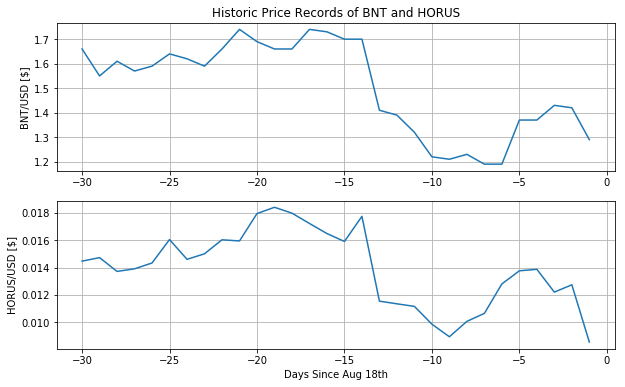

In [54]:
import matplotlib.pyplot as plt
import numpy as np

daysago = np.arange(-(len(bntclosing)),0)# go from -30 days to 0

fig, ax = plt.subplots(figsize=(10,6))
ax1 = plt.subplot(211)
plt.plot(daysago, bntclosing)
plt.title("Historic Price Records of BNT and HORUS")
plt.ylabel("BNT/USD [$]")
plt.grid(True)
ax2 = plt.subplot(212)
plt.plot(daysago,horclosing)
plt.xlabel("Days Since Aug 18th")
plt.ylabel("HORUS/USD [$]")
plt.grid(True)
plt.show()



## Historical HORUS/BNT Prices
Since the market price for each token changes over time, find the price of HORUS/BNT to see how those changes could alter our connnector weight over time.

Current Price HORUS/BNT:  118.33 BNT


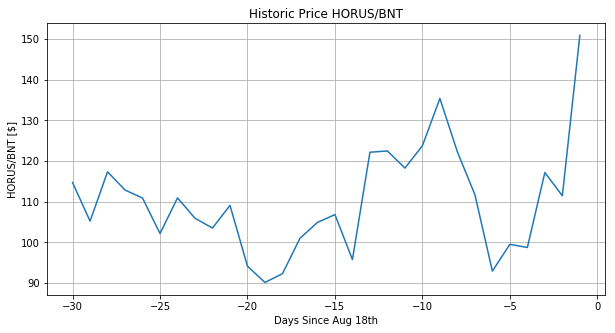

In [119]:
# $1.7 USD = 1 BNT
# $ 0.12 USD = 1 HORUS

# $1.7USD/($0.12USD/HORUS) = 1 BNT
bnt2usd = 1.42
hor2usd = 0.012
hor2bnt = bnt2usd/hor2usd
print("Current Price HORUS/BNT: ", "%0.2f" % hor2bnt, "BNT" )

hor2bnt_hist = [bnt/hor for (bnt,hor) in zip(bntclosing,horclosing)]

plt.figure(figsize=(10,5))
plt.plot(daysago,hor2bnt_hist)
plt.title("Historic Price HORUS/BNT")
plt.xlabel("Days Since Aug 18th")
plt.ylabel("HORUS/BNT [$]")
plt.grid(True)

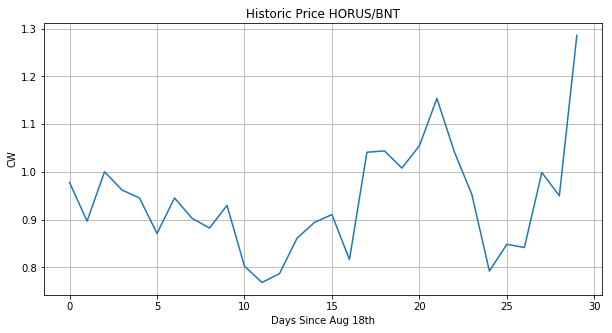

CW_average:  0.9389629550599877
CW_median:  0.9376482403877731
CW_std:      0.11132801281982863
95% CI: [ 0.6036642019282872 , 1.271632278847259 ]


In [118]:
# Given an initial supply of 

BNTinit = 14084.5070
HORUSinit   = 1652755.9706 # HORUS

cw = []
for x in hor2bnt_hist:
    out = BNTinit/(HORUSinit/x)
    cw.append(out)
    
plt.figure(figsize=(10,5))
plt.plot(cw)
plt.title("Historic Price HORUS/BNT")
plt.xlabel("Days Since Aug 18th")
plt.ylabel("CW")
plt.grid(True)
plt.show()

CW_average = np.mean(cw)
CW_median = np.median(cw)
CW_std    = np.std(cw)
print("CW_average: ", CW_average)
print("CW_median: ", CW_median)
print("CW_std:     ", CW_std)
print("95% CI: [", CW_median-3*CW_std, ",", CW_median+3*CW_std, "]")

# cwmed = [c-CW_median for c in cw]
# plt.hist(cwmed)

## Note: 
So, based off of the previous prices of HORUS and BNT, we can say that we are 95% confident that the connector weight will be between 0.603 and 1.27 from our current estimate.

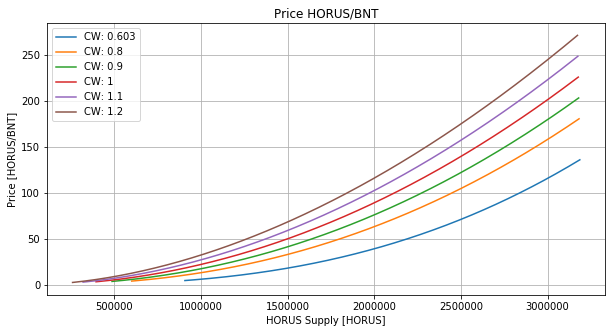

In [117]:
########## INPUTS ##########

# BNTinit = 14084.5070
# HORUSinit   = 1652755.9706 # HORUS

# global BNTbalance, HORUSsupply, CW
# BNTbalance = BNTinit #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
# HORUSsupply = HORUSinit
# HORUSmarketcap = BNTbalance # HORUSsupply / 118.333

price_list = []
horus_supply = []
bnt_supply = []
CW_list = [0.603, 0.8, 0.9, 1, 1.1, 1.2]
for CW in CW_list:
    BNTinit = 14084.5070
#     HORUSinit   = 1652755.9706 # HORUS
    HORUSinit   = 3200000 # HORUS () use 3.2 M Horus, to show 2x what we estimate we would need

    global BNTbalance, HORUSsupply
    BNTbalance = BNTinit #0.5*bancor.get_tokmarketcap(horus,eoscon) # this creates a CW of 0.50
    HORUSsupply = HORUSinit
    HORUSmarketcap = BNTbalance # HORUSsupply / 118.333


    price = []
    BNTlist = np.ones(1000)*100 # make 1000 deposits of 100 BNT
    bntbal = []
    horbal = []
    for BNTreceived in BNTlist:
        Hissued = BNTtoHORUS(BNTreceived)
        p = 1.0/effective_price(con_exchanged=BNTreceived,smart_exchanged=Hissued)
        price.append(p)
        bntbal.append(BNTbalance)
        horbal.append(HORUSsupply)
        
    price_list.append(price)
    horus_supply.append(horbal)
    bnt_supply.append(bntbal)

plt.figure(figsize=(10,5))
for (CW, hor, price) in zip(CW_list, horus_supply,price_list):
    plt.plot(hor,price,label="CW: " + str(CW))
    

plt.title("Price HORUS/BNT")
plt.xlabel("HORUS Supply [HORUS]")
plt.ylabel("Price [HORUS/BNT]")
plt.legend()
plt.grid(True)
plt.show()


# Conclusion: 
The figure above shows how the price of HORUS will change for 1000 continuous deposits of 100 BNT. Notice that as the supply of HORUS decreases, the price also decreases, which *should* incentivize the market to purchase respond by purchasing HORUS->BNT in response to this discounted price. Note that this graph started with 3.2M Horus, to show what the price would be if we started with an initial suuply of 1.6M HORUS and everyone began to sell it for BNT - increasing the supply to 3.2M Horus. The graph increases in stability (flatter plots) as the supply of horus decreases (reflecting a demand for HORUS). If there is a sell off of HORUS, the graph would go farther to the right and the price becomes less stable (steeper price plots), which would lead to large changes in price for every transaction of HORUS. In this case, in order to increase stability of the HORUS price, we would have to increase the HORUS supply by depositing more HORUS into the relay account. This is where a small fee of ~1% per transaction could be used to increase the reserve of HORUS in this account over time, which would increase the stablity of the relay token.